# Predict the house price


In [1]:
#work on titanic dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset
df=pd.read_excel('DS - Assignment Part 1 data set.xlsx')

In [3]:
#read head()
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
#check null values of dataset
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

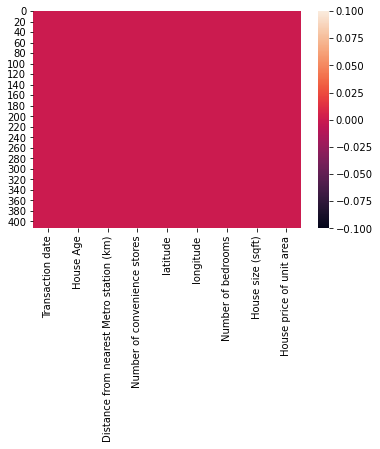

In [5]:
#visulisation
sns.heatmap(df.isnull())
plt.show()

In [6]:
#shape of dataset
df.shape

(414, 9)

In [7]:
#check datatype
df.dtypes

Transaction date                            float64
House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
dtype: object

In [8]:
#first check  relation between input and output 
#and output : price which want to predict
#here output is contineous numeric value
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

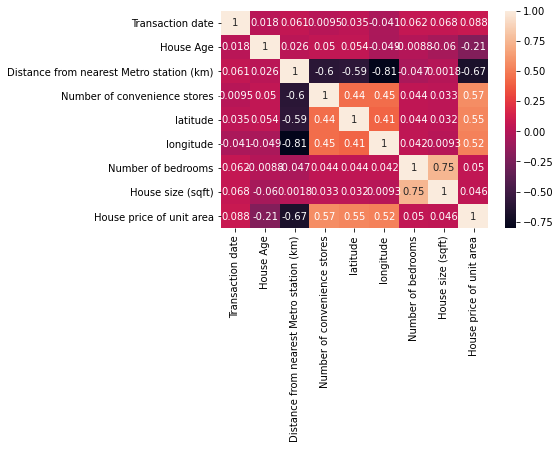

In [9]:
#check correlation value
sns.heatmap(df.corr(),annot=True)
plt.show()

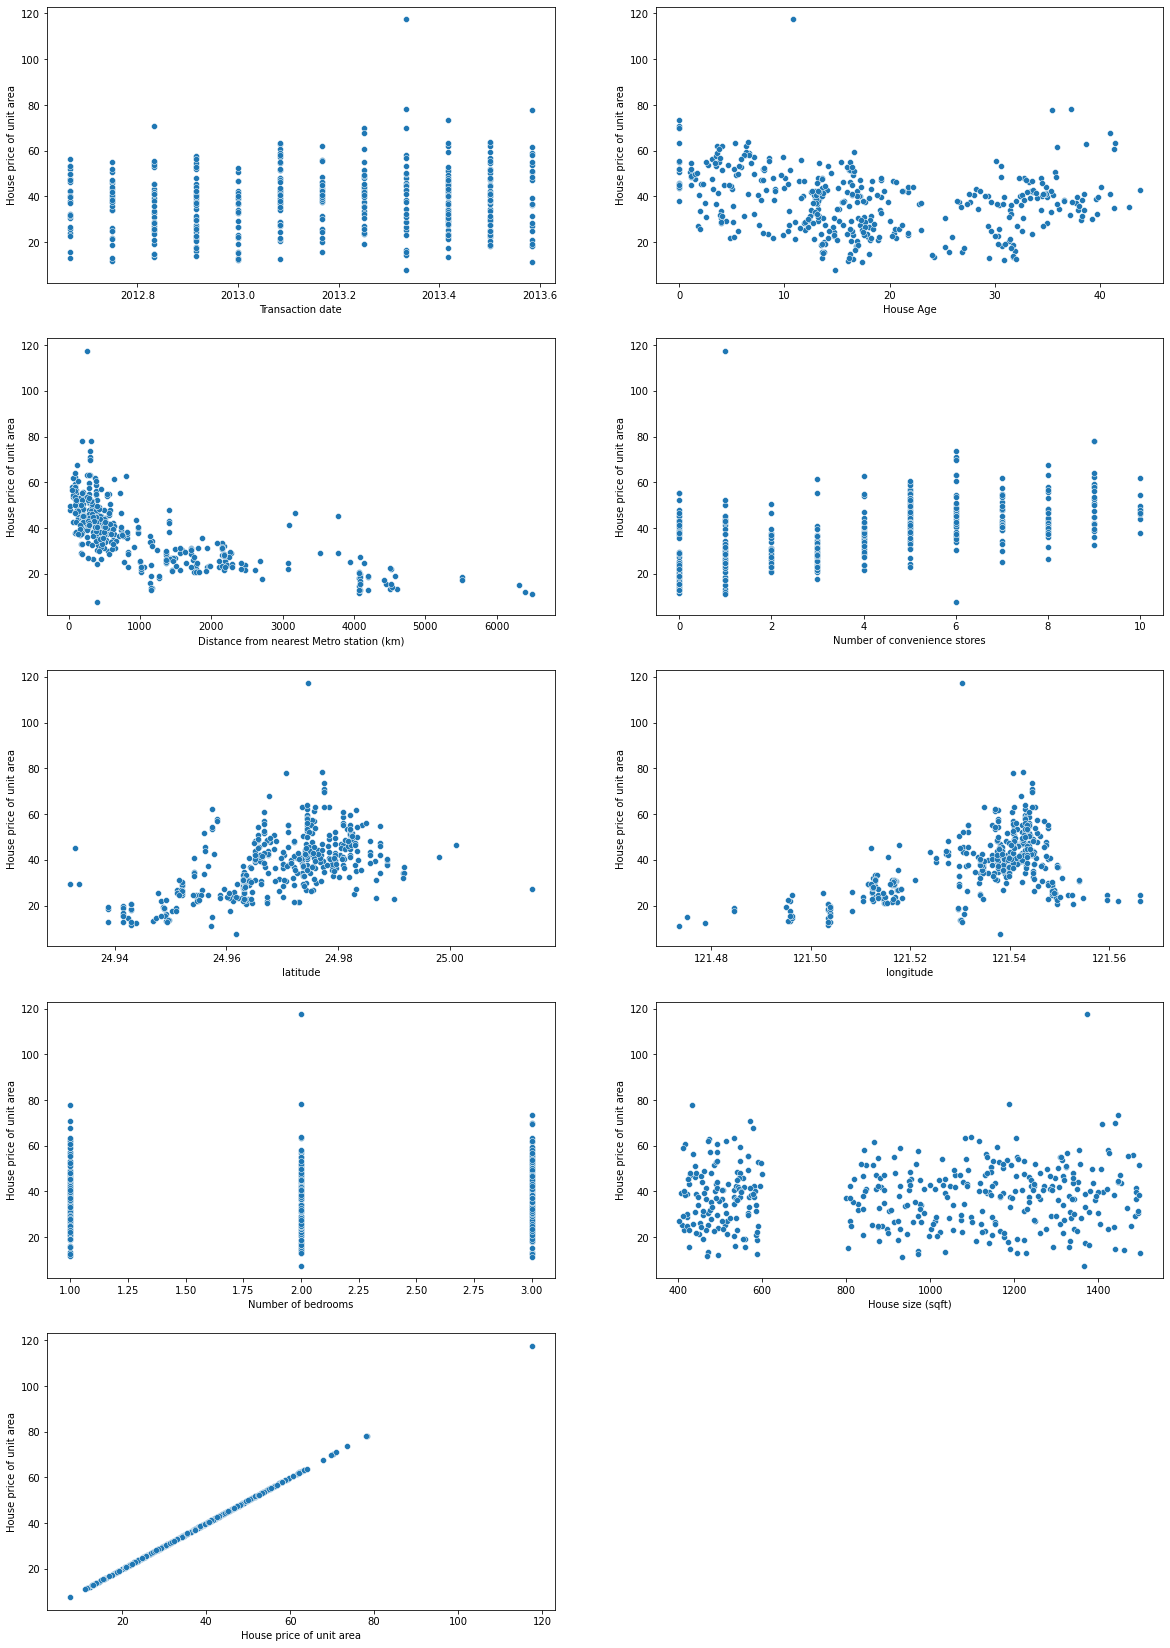

In [10]:
#input columns list only #list of all input 
columns=['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area']
plt.figure(figsize=(20,60))
for i,col in enumerate(columns):
    plt.subplot(10,2,i+1)
    sns.scatterplot(data=df,x=col,y='House price of unit area')
plt.show()

In [11]:
#select input and output from dataset
X=df.drop('House price of unit area',axis=1) #input
Y=df['House price of unit area'] #output

In [12]:
X.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491


In [13]:
Y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: House price of unit area, dtype: float64

In [14]:
#Apply standard scaler on input
from sklearn.preprocessing import StandardScaler

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [16]:
X_train.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
274,2013.166667,27.5,394.0173,7,24.97305,121.53994,1,544
271,2012.916667,17.7,451.6419,8,24.96945,121.54490,3,978
98,2013.416667,16.4,289.3248,5,24.98203,121.54348,3,1323
69,2012.833333,12.5,561.9845,5,24.98746,121.54391,1,581
378,2013.333333,37.3,587.8877,8,24.97077,121.54634,2,1040


In [17]:
#create an object of StandardScaler class
'''
ss= StandardScaler()
X=ss.fit_transform(X) #convert into numpy array
'''

'\nss= StandardScaler()\nX=ss.fit_transform(X) #convert into numpy array\n'

In [18]:
#perform model with the help of linearregression
from sklearn.linear_model import LinearRegression

In [19]:
#create an object of linearregression class
lr=LinearRegression()

In [20]:
#Train the model #here we use full dataset 
#use inbuilt method fit() of linearegression 
#train the model fit 70% data
lr.fit(X_train,Y_train) 
#y=m1*x1 + m2*x2 + m3*x3 + c #equation for multiple linear regression 

LinearRegression()

In [21]:
#check slope/ coefficient
m=lr.coef_
print("slope/ coefficient is :",m)

slope/ coefficient is : [ 3.77992287e+00 -2.33299128e-01 -3.99271515e-03  1.24748482e+00
  2.20887090e+02  5.25286234e-01  2.00341665e+00 -4.63256203e-03]


In [22]:
#check intercept
c=lr.intercept_
print("intercept is: ",c)

intercept is:  -13147.28800175538


In [23]:
#Y_pred=m*x+c
#test the model, use inbuilt method predict()
Y_pred=lr.predict(X_test)

In [24]:
X_test.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
388,2013.500000,10.4,2251.9380,4,24.95957,121.51353,1,505
102,2013.083333,1.1,193.5845,6,24.96571,121.54089,3,1028
187,2013.000000,8.9,3078.1760,0,24.95464,121.56627,3,1175
162,2012.750000,16.0,4066.5870,0,24.94297,121.50342,1,469
90,2012.833333,0.0,274.0144,1,24.97480,121.53059,2,954


In [25]:
#create a dictionary 
dict={"Actual Oputpt":Y_test,"Prediced output":Y_pred}
#convert dictionary into dataframe
df1=pd.DataFrame(dict)

In [26]:
df1.head(15)

,Actual Oputpt,Prediced output
388,27.3,33.899105
102,54.4,48.161829
187,22.0,23.911967
162,11.6,14.017107
90,45.4,41.256766
398,23.0,33.675546
295,21.8,32.797285
397,32.2,45.019872
17,37.4,36.432025
58,22.6,13.144359


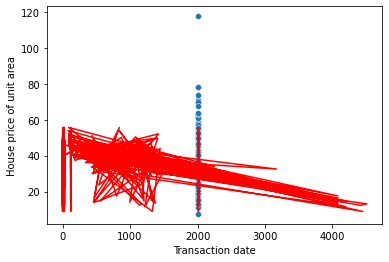

In [27]:
#visualize
sns.scatterplot(data=df,x='Transaction date',y='House price of unit area')
plt.plot(X_test,Y_pred,c='red')
plt.show()

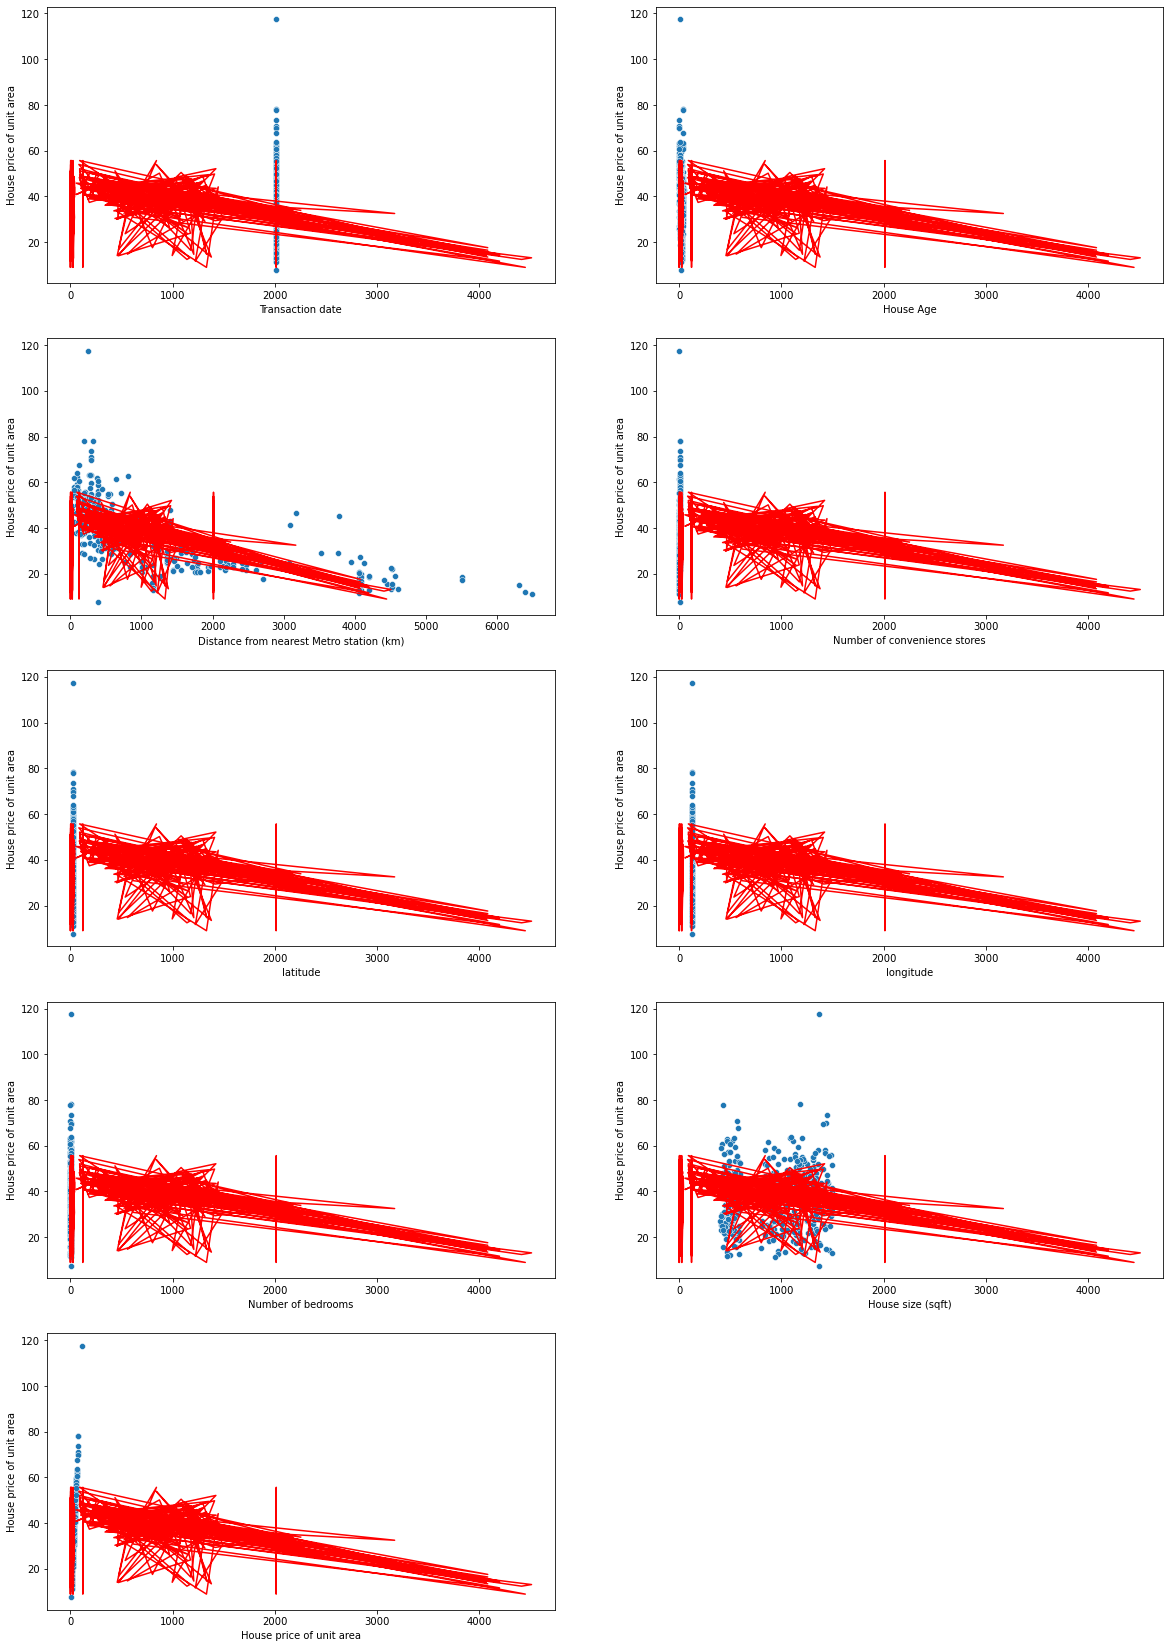

In [28]:
#input columns list only #list of all input 
columns=['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area']
plt.figure(figsize=(20,60))
for i,col in enumerate(columns):
    plt.subplot(10,2,i+1)
    sns.scatterplot(data=df,x=col,y='House price of unit area')
    plt.plot(X_test,Y_pred,c='red')
plt.show()

In [29]:
#Evaluation of model
#mean Square Error 1/N*sum (Y-Y_Pred)**2
from sklearn.metrics import mean_squared_error
print("MSE: ",mean_squared_error(Y_test,Y_pred))

MSE:  113.92553813078706


In [30]:
#root mean squared error
mse=mean_squared_error(Y_test,Y_pred)
rme=np.sqrt(mse)
print("Root mean squared error: ",rme)

Root mean squared error:  10.673590685930723


In [31]:
#how will we find that this error is acurate as there is no range given
#check model is perfect or not , find r2-score
from sklearn.metrics import r2_score
print("R2-score: ",r2_score(Y_test,Y_pred))
#as R2-score is near 0.5 we will check for other input too

R2-score:  0.5055850801458877


In [32]:
# Assumptions of Linear Regression : -
'''1. should not be Multicolinearity in linear regression  
 Solve this assumption .means we removed the Multicolinearity situation
 #first Assumption : Should not be Multicolinearity 
#what is multicolinearity ?

MUlticolinearity means two inputs correlated each other

  X1               X2                      Y
Area in Sqft  no_of_rooms                price

Y->X1 and Y->X2

but remember , both input should not be correlated each other 

'''

'1. should not be Multicolinearity in linear regression  \n Solve this assumption .means we removed the Multicolinearity situation\n #first Assumption : Should not be Multicolinearity \n#what is multicolinearity ?\n\nMUlticolinearity means two inputs correlated each other\n\n  X1               X2                      Y\nArea in Sqft  no_of_rooms                price\n\nY->X1 and Y->X2\n\nbut remember , both input should not be correlated each other \n\n'

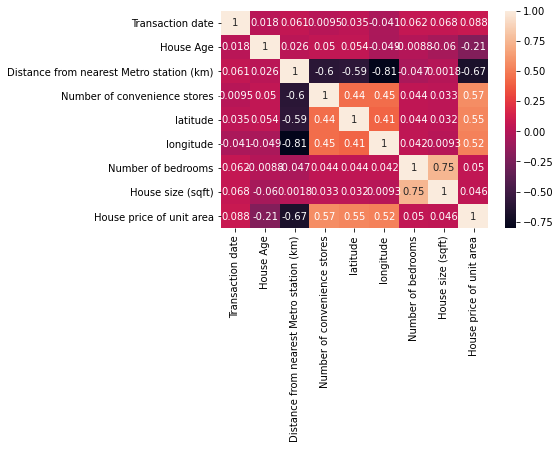

In [33]:
#check MUlticolinearity
#visulise corr() value
sns.heatmap(df.corr(),annot=True)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
X_train

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
274,2013.166667,27.5,394.0173,7,24.97305,121.53994,1,544
271,2012.916667,17.7,451.6419,8,24.96945,121.54490,3,978
98,2013.416667,16.4,289.3248,5,24.98203,121.54348,3,1323
69,2012.833333,12.5,561.9845,5,24.98746,121.54391,1,581
378,2013.333333,37.3,587.8877,8,24.97077,121.54634,2,1040
...,...,...,...,...,...,...,...,...
255,2013.416667,31.5,5512.0380,1,24.95095,121.48458,2,1368
72,2013.583333,32.5,424.5442,8,24.97587,121.53913,2,1392
396,2012.666667,37.1,918.6357,1,24.97198,121.55063,2,907
235,2012.750000,12.9,250.6310,7,24.96606,121.54297,2,1035


In [35]:
corrmatrix = X_train.corr()
#corrmatrix = pd.DataFrame( X_train).corr()

In [36]:
corrmatrix

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
Transaction date,1.000000,-0.010988,0.103811,-0.018054,-0.007962,-0.100909,0.118349,0.065722
House Age,-0.010988,1.000000,0.040520,-0.015395,0.056686,-0.086285,0.006898,-0.034807
Distance from nearest Metro station (km),0.103811,0.040520,1.000000,-0.605529,-0.529031,-0.797457,-0.033579,0.024818
Number of convenience stores,-0.018054,-0.015395,-0.605529,1.000000,0.439259,0.402403,0.032145,0.048376
latitude,-0.007962,0.056686,-0.529031,0.439259,1.000000,0.329708,0.033067,-0.005698
longitude,-0.100909,-0.086285,-0.797457,0.402403,0.329708,1.000000,0.021395,-0.015703
Number of bedrooms,0.118349,0.006898,-0.033579,0.032145,0.033067,0.021395,1.000000,0.790667
House size (sqft),0.065722,-0.034807,0.024818,0.048376,-0.005698,-0.015703,0.790667,1.000000


In [38]:
def correlation(df, threshold):
    correlated_cols = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols
        

In [39]:
correlation(X_train,0.6)

{'House size (sqft)', 'Number of convenience stores', 'longitude'}

In [40]:
corr_feature = correlation(X_train,0.6)

In [41]:
corr_feature 

{'House size (sqft)', 'Number of convenience stores', 'longitude'}

In [42]:
X_train.shape, X_test.shape

((289, 8), (125, 8))

In [43]:
X_train.drop(labels=corr_feature,axis=1,inplace=True)
X_test.drop(labels=corr_feature,axis=1,inplace=True)

In [44]:
X_train.shape, X_test.shape

((289, 5), (125, 5))

In [45]:
#Train the model #here we use full dataset 
#use inbuilt method fit() of linearegression 
#train the model fit 70% data
lr.fit(X_train,Y_train) 
#y=m1*x1 + m2*x2 + m3*x3 + c #equation for multiple linear regression 

LinearRegression()

In [46]:
#check slope/ coefficient
m=lr.coef_
print("slope/ coefficient is :",m)

slope/ coefficient is : [ 4.45057973e+00 -2.28168980e-01 -5.60506157e-03  2.68410276e+02
  3.99814970e-01]


In [47]:
#check intercept
c=lr.intercept_
print("intercept is: ",c)

intercept is:  -15614.508869054858


In [48]:
#Y_pred=m*x+c
#test the model, use inbuilt method predict()
Y_pred=lr.predict(X_test)

In [49]:
#Evaluation of model
#mean Square Error 1/N*sum (Y-Y_Pred)**2
from sklearn.metrics import mean_squared_error
print("MSE: ",mean_squared_error(Y_test,Y_pred))

MSE:  110.92777343711504


In [50]:
#create a dictionary 
dict={"Actual Oputpt":Y_test,"Prediced output":Y_pred}
#convert dictionary into dataframe
df1=pd.DataFrame(dict)

In [51]:
df1.head(15)

,Actual Oputpt,Prediced output
388,27.3,31.543109
102,54.4,45.795539
187,22.0,24.505325
162,11.6,12.300597
90,45.4,46.523100
398,23.0,34.503589
295,21.8,30.402972
397,32.2,46.035508
17,37.4,41.454918
58,22.6,11.973778


In [52]:
#root mean squared error
mse=mean_squared_error(Y_test,Y_pred)
rme=np.sqrt(mse)
print("Root mean squared error: ",rme)

Root mean squared error:  10.532225474092122


In [53]:
#how will we find that this error is acurate as there is no range given
#check model is perfect or not , find r2-score
from sklearn.metrics import r2_score
print("R2-score: ",r2_score(Y_test,Y_pred))
#as R2-score is near 0.5 we will check for other input too

R2-score:  0.5185948022422786


In [54]:
#Assumption of Linear Regression 
#2. there should be a linear relationship between input and output
#Use Trick ,to check linear relation between multiple input and output
residual=Y_test-Y_pred
print(residual)

388    -4.243109
102     8.604461
187    -2.505325
162    -0.700597
90     -1.123100
         ...    
323    -0.530044
73      5.011010
238    -2.447790
273   -17.097158
364    -7.620516
Name: House price of unit area, Length: 125, dtype: float64


In [55]:
#create a dictonary
dic={'Y_pred':Y_pred,'Residual':residual}
df1=pd.DataFrame(dic)
df1.head()

,Y_pred,Residual
388,31.543109,-4.243109
102,45.795539,8.604461
187,24.505325,-2.505325
162,12.300597,-0.700597
90,46.523100,-1.123100


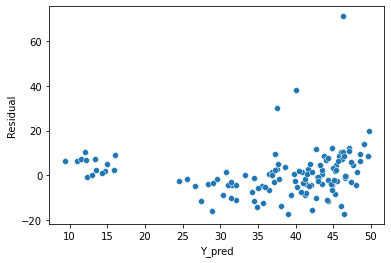

In [56]:
#visualize scatterplot between Y_pred and residual means
#there input x=Y_pred and y=residual because residual depends on Y_pred value
sns.scatterplot(data=df1,x='Y_pred',y='Residual')
plt.show()

In [57]:
# in above scatterplot, This is not a linear relation between Y_pred
#means second assumption is not fullfill

In [58]:
#3. Assumption :  if occur linear relation then next check relation should be
#homoskedatik means should not be heteroskedastik

In [59]:
#Homoskedastik means datapoints closes each other
#heteroskedastik means no datapoints close each other means scattered

In [60]:
#4. Assumption of linear regression : - Residual should be normally distributed
#curve means data should be euqally divide on both sides.
#normal distributed curve then use inbuilt function displot() of seaborn
#library ,distplot is also known as frequency graph
#use distplot() and histplot()

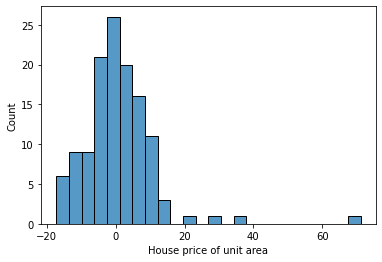

In [61]:
#create histogram (frequency graph)
sns.histplot(residual)
plt.show()

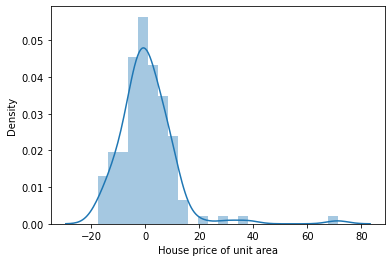

In [62]:
#create distplot()
sns.distplot(residual)
plt.show()

In [63]:
#find skewness
residual.skew()

2.809430706341824

In [64]:
#here we handled multicolinearity (removed multicolinearity (problem)
#but not working 3 assumption 
#means no relation relationship means here create a curve
##relation should be HOMOSKEDAStik : means datapoints are closely each other
#should not by Heteroskedastic  means should not be scattered
#if linear relationship occurs
# no normal distributed curve

In [65]:
#increase the degress of X means increase the power of X means 
#independent vairable(input variable)
#if increasing the degree or power of independent variable then It is called
#polynomial Linear regression(PLR)

In [66]:
#increase the degree of input variable=2
#equation Y=m1*TV*2+m2*TV+m3*input1*2+m4*input1+b
#we work on dataset 
#apply polynomial linear regression means increase the degree of independent
#variable X means degree=2 
#equation : ax2+bx+c=0  here 2 inputs ax1*2+bx1+cx2*2+dx2+e

In [67]:
#increasing the degree of input X so call inbuilt class PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

In [68]:
#create object of PolynomialFeatures class and pass the degree of input
poly=PolynomialFeatures(3) #there pass the degree =3 of input

In [69]:
X_poly=poly.fit_transform(X)
#fit_transform() inbuilt method of PolynomialFeatures class

In [70]:
X_poly

array([[1.00000000e+00, 2.01291667e+03, 3.20000000e+01, ...,
        5.75000000e+02, 3.30625000e+05, 1.90109375e+08],
       [1.00000000e+00, 2.01291667e+03, 1.95000000e+01, ...,
        4.96000000e+03, 3.07520000e+06, 1.90662400e+09],
       [1.00000000e+00, 2.01358333e+03, 1.33000000e+01, ...,
        9.54000000e+03, 3.37080000e+06, 1.19101600e+09],
       ...,
       [1.00000000e+00, 2.01325000e+03, 1.88000000e+01, ...,
        5.03000000e+02, 2.53009000e+05, 1.27263527e+08],
       [1.00000000e+00, 2.01300000e+03, 8.10000000e+00, ...,
        5.97000000e+02, 3.56409000e+05, 2.12776173e+08],
       [1.00000000e+00, 2.01350000e+03, 6.50000000e+00, ...,
        4.38800000e+03, 2.40681800e+06, 1.32013967e+09]])

In [71]:
#object of linearregression
lr=LinearRegression()
#train the model with 70% data
lr.fit(X_train,Y_train)

LinearRegression()

In [72]:
lr.coef_ 

array([ 4.45057973e+00, -2.28168980e-01, -5.60506157e-03,  2.68410276e+02,
        3.99814970e-01])

In [73]:
lr.intercept_

-15614.508869054858

In [74]:
#test the model
Y_pred=lr.predict(X_test)

In [75]:
#score , all 3 assumpltion, degree change krna hai 2 se 3

In [76]:
#find mean squared error
mean_squared_error(Y_test,Y_pred)

110.92777343711504

In [77]:
#how will we find that this error is acurate as there is no range given
#check model is perfect or not , find r2-score
print("R2-score: ",r2_score(Y_test,Y_pred))
#0-1, if negetive- we consider it as 0 only

R2-score:  0.5185948022422786


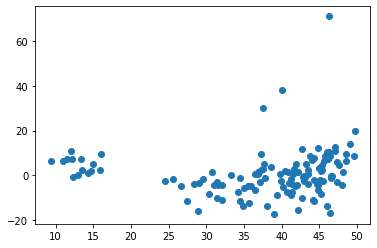

In [78]:
#chek assumptions
#1. check linear relation
#find residual 
residual=Y_test-Y_pred
plt.scatter(Y_pred,residual)
plt.show()

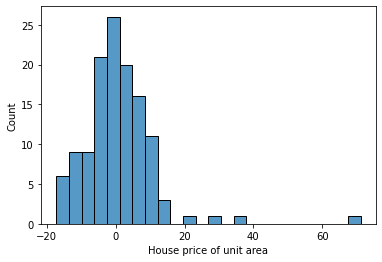

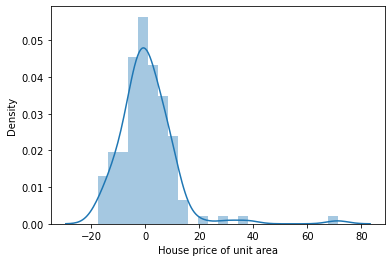

2.809430706341824

In [79]:
#create normal distribution curve
sns.histplot(residual)
plt.show()
sns.distplot(residual)
plt.show()
residual.skew()

In [80]:
#conclusion
'''
linear model only get succefull when all assumptions come true 
'''

'\nlinear model only get succefull when all assumptions come true \n'

In [81]:
#to check coefficient or slope
m1=lr.coef_ #here m1 is a list object 
#print(m1)
#list comprehention
m1=[np.round(i,2) for i in m1]
print(m1)

[4.45, -0.23, -0.01, 268.41, 0.4]


In [82]:
#find training score, us einbuilt method of linearregression
lr.score(X_train,Y_train)

0.5582115103339329

In [83]:
lr.score(X_test,Y_test)
#model is overfit as lr.score(X_train,Y_train) > lr.score(X_test,Y_test)
# 0.8504573774895473 > 0.2869653166850389 orverfit 

0.5185948022422786

In [84]:
#test the model with 30% data
Y_pred=lr.predict(X_test)
#find r2_score
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred) 
#lr.score(X_test,Y_test) == r2_score(Y_test,Y_pred) 

0.5185948022422786

In [85]:
#there clearly , model is overfitting why?
#because training score> testing score
#means training error < testing error
#to reduce overfit, use Regularisation technique

In [86]:
#lasso 200-1000
''' Add some error during training time 
   1. Lasso Regularization : L1  
   RSS Error+lambda*sum(abs(all coefficient or slope)) here lambda is also known as 
   hyper-parameter, value of lambda  can be 200,400,600,..1000
   2. Ridge Regularization : L2
   RSS Error+lambda*sum(square(all coefficient)) here lambda is also known as 
   hyper-parameter, value of lambda  can be 0 to 50
'''

' Add some error during training time \n   1. Lasso Regularization : L1  \n   RSS Error+lambda*sum(abs(all coefficient or slope)) here lambda is also known as \n   hyper-parameter, value of lambda  can be 200,400,600,..1000\n   2. Ridge Regularization : L2\n   RSS Error+lambda*sum(square(all coefficient)) here lambda is also known as \n   hyper-parameter, value of lambda  can be 0 to 50\n'

In [87]:
from sklearn.linear_model import Lasso
#create object of Lasso class
L1=Lasso(200) #passing the value of lambda(hyper-parameter)


In [88]:
#train the model with lasso with 70% data
L1.fit(X_train,Y_train)

Lasso(alpha=200)

In [89]:
#check slope/coefficient after add error on trainned time (with Lasso)
slope_L1=L1.coef_
slope_L1
Slope_L1=[np.round(i,2) for i in slope_L1] #list comprehension
print(Slope_L1)

[0.0, -0.0, -0.01, 0.0, 0.0]


In [90]:
X.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)'],
      dtype='object')

In [91]:
#check error of training 

print('training error: ',L1.score(X_train,Y_train))

training error:  0.46153327470438865


In [92]:
#check error of testing

print('testing error: ',L1.score(X_test,Y_test))

testing error:  0.43727973492294825


In [93]:
# right method  to select the value of lambda/alpha(Hyper parameter) 
#in case of Lasso (200-1000)
for i in range(200,1001,50):  #start=200  stop=1001-1=1000 step=50
    #create the object of Lasso class
    L1=Lasso(i) #passing the value of lamda means i=200 , next i=250 then 300...
    #train the model with 70% data
    L1.fit(X_train,Y_train)
    print("Value of Lambda : {}".format(i))
    score1=L1.score(X_train,Y_train).round(2)
    print("training Score : {}".format(score1))
    score2=L1.score(X_test,Y_test).round(2)
    print("testing Score : {}".format(score2))
    print("\n")

Value of Lambda : 200
training Score : 0.46
testing Score : 0.44


Value of Lambda : 250
training Score : 0.46
testing Score : 0.44


Value of Lambda : 300
training Score : 0.46
testing Score : 0.44


Value of Lambda : 350
training Score : 0.46
testing Score : 0.44


Value of Lambda : 400
training Score : 0.46
testing Score : 0.44


Value of Lambda : 450
training Score : 0.46
testing Score : 0.43


Value of Lambda : 500
training Score : 0.46
testing Score : 0.43


Value of Lambda : 550
training Score : 0.46
testing Score : 0.43


Value of Lambda : 600
training Score : 0.46
testing Score : 0.43


Value of Lambda : 650
training Score : 0.46
testing Score : 0.43


Value of Lambda : 700
training Score : 0.46
testing Score : 0.43


Value of Lambda : 750
training Score : 0.46
testing Score : 0.43


Value of Lambda : 800
training Score : 0.46
testing Score : 0.43


Value of Lambda : 850
training Score : 0.46
testing Score : 0.43


Value of Lambda : 900
training Score : 0.46
testing Score : 0.

In [94]:
#Apply Ridge Regularisation ,value of lambda=0-50
from sklearn.linear_model import Ridge
#RSS+lambda*sum(square(all slope)) in ridge L2
#RSS+lambda*sum(absolute(all slope)) in lasso L1

In [95]:
#choose right value of lambda in Ridge Regularisation
for i in range(0,51,1): #start =0  stop=51-1=50 step=+1
    #create the object of Ridge class
    L2=Ridge(i) #passing the value of lambda means i=0 next i=1  so on
    #train the model with 70% data after add error
    L2.fit(X_train,Y_train)
    print("Value of Lambda : {}".format(i))
    score1=L2.score(X_train,Y_train).round(2)
    print("training Score : {}".format(score1))
    score2=L2.score(X_test,Y_test).round(2)
    print("testing Score : {}".format(score2))
    print("\n")
    
    #15

Value of Lambda : 0
training Score : 0.56
testing Score : 0.52


Value of Lambda : 1
training Score : 0.51
testing Score : 0.5


Value of Lambda : 2
training Score : 0.51
testing Score : 0.5


Value of Lambda : 3
training Score : 0.51
testing Score : 0.5


Value of Lambda : 4
training Score : 0.51
testing Score : 0.5


Value of Lambda : 5
training Score : 0.51
testing Score : 0.5


Value of Lambda : 6
training Score : 0.51
testing Score : 0.5


Value of Lambda : 7
training Score : 0.51
testing Score : 0.5


Value of Lambda : 8
training Score : 0.51
testing Score : 0.5


Value of Lambda : 9
training Score : 0.51
testing Score : 0.5


Value of Lambda : 10
training Score : 0.51
testing Score : 0.5


Value of Lambda : 11
training Score : 0.51
testing Score : 0.5


Value of Lambda : 12
training Score : 0.51
testing Score : 0.49


Value of Lambda : 13
training Score : 0.51
testing Score : 0.49


Value of Lambda : 14
training Score : 0.51
testing Score : 0.49


Value of Lambda : 15
training S

In [130]:
#in ridge , value of lambda=8
L2=Ridge(1) #passing the value of Lambda=8
#train the model with 70% data after add error
L2.fit(X_train,Y_train) 

Ridge(alpha=1)

In [131]:
#check slope/coefficient after add error on trainned time (with Lasso)
slope_L2=L2.coef_
slope_L2
Slope_L2=[np.round(i,2) for i in slope_L2] #list comprehension
print(Slope_L2)

[4.78, -0.21, -0.01, 8.31, 0.44]


In [132]:
X.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)'],
      dtype='object')

In [133]:
#create a dictionary 
'''
dict={'Input':X.columns,'Slope_before':m1,'Slope_After_Ridge':Slope_L2}
#convert to dataframe
df1=pd.DataFrame(dict)
df1
'''

"\ndict={'Input':X.columns,'Slope_before':m1,'Slope_After_Ridge':Slope_L2}\n#convert to dataframe\ndf1=pd.DataFrame(dict)\ndf1\n"

In [134]:
#cross validation
from sklearn.model_selection import cross_val_score
#cross_val_score inbuilt class for cross_validation 
#How to decided , Lasso is better or Ridge is better omn this dataset 
#Apply cross validation
#from sklearn.model_selection import cross_val_score 
#cross_val_score  inbuilt class for cross validation

In [135]:
#create the object of lasso(apply cross validation in lasso)
L1=Lasso(200) #pass the value of lambda=200


In [136]:
#create the object for cross_val_score for lasso(for cross val)
cross_L1=cross_val_score(L1,X,Y,cv=4) #diviting data to 4 parts
#cross_val_score(object of lasso class,input,output,no. of partition)
#here l1 object of Lasso and 
#X input and Y output and  cv means divided the no. of parts of data=4


In [137]:
print(cross_L1) #score of each part

[0.52498891 0.47574549 0.32815264 0.49293311]


In [138]:
#to find avrage of score means mean of all score of cross_L1  
m1=cross_L1.mean()
print("Average score in cross validation in Lasso : ",m1)

Average score in cross validation in Lasso :  0.4554550384341368


In [139]:
#create the object of ridge(apply cross validation in ridge)
L2=Ridge(1) #pass the value of ridge=15


In [140]:
cross_L2=cross_val_score(L2,X,Y,cv=4) #diviting data to 4 parts

In [141]:
print(cross_L2) #score of each part Ridge

[0.68766142 0.51133905 0.38882097 0.57919748]


In [142]:
#to find avrage of score means mean of all score of cross_L2 Ridge
m1=cross_L2.mean()
print("Average score in cross validation in Ridge : ",m1)

Average score in cross validation in Ridge :  0.5417547302420826


In [143]:
#Mean of Lasso is greater than Ridge so Select Lasso Regularization
#in this dataset
#in this dataset Lasso regularisation is best as 
#compared to Ridge regularisation because average means mean of  of  score
#of lasso is greater than ridge regularisation